In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import pandas as pd


In [2]:
 
# list all csv files only
csv_files = glob.glob('../data/X46789_*.{}'.format('csv'))
csv_files.sort()

csv_files

['../data/X46789_2018-01-19T05-37-42.612Z.csv',
 '../data/X46789_2018-01-19T05-56-20.307Z.csv',
 '../data/X46789_2018-01-19T07-20-52.339Z.csv',
 '../data/X46789_2018-01-19T07-39-30.012Z.csv',
 '../data/X46789_2018-01-19T07-58-07.733Z.csv',
 '../data/X46789_2018-01-19T09-00-42.821Z.csv',
 '../data/X46789_2018-01-19T09-19-24.965Z.csv',
 '../data/X46789_2018-01-19T09-38-02.634Z.csv',
 '../data/X46789_2018-01-19T09-56-40.312Z.csv',
 '../data/X46789_2018-01-19T10-19-41.226Z.csv',
 '../data/X46789_2018-01-19T10-38-18.941Z.csv',
 '../data/X46789_2018-01-22T03-15-35.111Z.csv',
 '../data/X46789_2018-01-22T03-56-59.619Z.csv',
 '../data/X46789_2018-01-22T09-17-43.409Z.csv',
 '../data/X46789_2018-01-22T09-36-24.545Z.csv',
 '../data/X46789_2018-01-22T10-13-39.943Z.csv']

In [10]:
 
df_csv_append = pd.DataFrame()
 
# append the CSV files
for file in csv_files:
    df = pd.read_csv(file, sep=';')
    df_csv_append = pd.concat([df_csv_append, df], ignore_index=True)
df_csv_append = df_csv_append.set_index('dateHour')
df_csv_append.index = pd.to_datetime(df_csv_append.index)
df_csv_append = df_csv_append.astype('float')
#df_csv_append = df_csv_append.sort_index()
#df_csv_append.to_csv("X46789_dt.csv")
df_csv_append.head()
display(df_csv_append.describe())

,gpsSpeed,gpsSatCount,Gear,Brake_pedal,Accel_pedal,Machine_Speed_Mesured,AST_Direction,Ast_HPMB1_Pressure_bar,Ast_HPMA_Pressure_bar,Pressure_HighPressureReturn,Pressure_HighPressure,Oil_Temperature,Ast_FrontAxleSpeed_Rpm,Pump_Speed
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,42.094564,100.977843,132.335303,132.335303,18.058346,20.0,20.0,0.644756,0.644756,0.644756,32975.773264,148.594535,32975.773264,1079.725258
std,37.237280,74.149373,5.288413,5.288413,27.304508,0.0,0.0,2.398590,2.398590,2.398590,183.969456,82.375918,183.969456,338.018689
min,0.000000,0.000000,124.000000,124.000000,0.000000,20.0,20.0,0.000000,0.000000,0.000000,32767.000000,11.000000,32767.000000,577.000000
25%,0.360000,25.000000,126.000000,126.000000,0.000000,20.0,20.0,0.000000,0.000000,0.000000,32767.000000,74.000000,32767.000000,649.000000
50%,61.905000,102.500000,137.000000,137.000000,0.000000,20.0,20.0,0.000000,0.000000,0.000000,33075.000000,153.000000,33075.000000,1145.000000
75%,80.300000,156.000000,137.000000,137.000000,27.000000,20.0,20.0,0.000000,0.000000,0.000000,33165.000000,255.000000,33165.000000,1386.000000
max,87.060000,255.000000,137.000000,137.000000,92.000000,20.0,20.0,13.000000,13.000000,13.000000,33195.000000,255.000000,33195.000000,1799.000000


In [13]:
df_csv_append.columns
df_extract = df_csv_append[[c for c in df_csv_append.columns if c not in ['Machine_Speed_Mesured', 'AST_Direction', 'Ast_HPMB1_Pressure_bar','Ast_HPMA_Pressure_bar', 'Pressure_HighPressureReturn'] ]]
df_extract.head()

,gpsSpeed,gpsSatCount,Gear,Brake_pedal,Accel_pedal,Pressure_HighPressure,Oil_Temperature,Ast_FrontAxleSpeed_Rpm,Pump_Speed
dateHour,,,,,,,,,
2018-01-19 05:37:00.612611,8.62,94.0,131.0,131.0,0.0,32826.0,58.0,32826.0,894.0
2018-01-19 05:37:00.747017,8.52,84.0,131.0,131.0,0.0,32825.0,57.0,32825.0,880.0
2018-01-19 05:37:00.847016,7.65,253.0,131.0,131.0,0.0,32824.0,56.0,32824.0,864.0
2018-01-19 05:37:00.947023,8.32,64.0,131.0,131.0,0.0,32823.0,55.0,32823.0,855.0
2018-01-19 05:37:01.047027,8.17,49.0,131.0,131.0,0.0,32823.0,55.0,32823.0,843.0


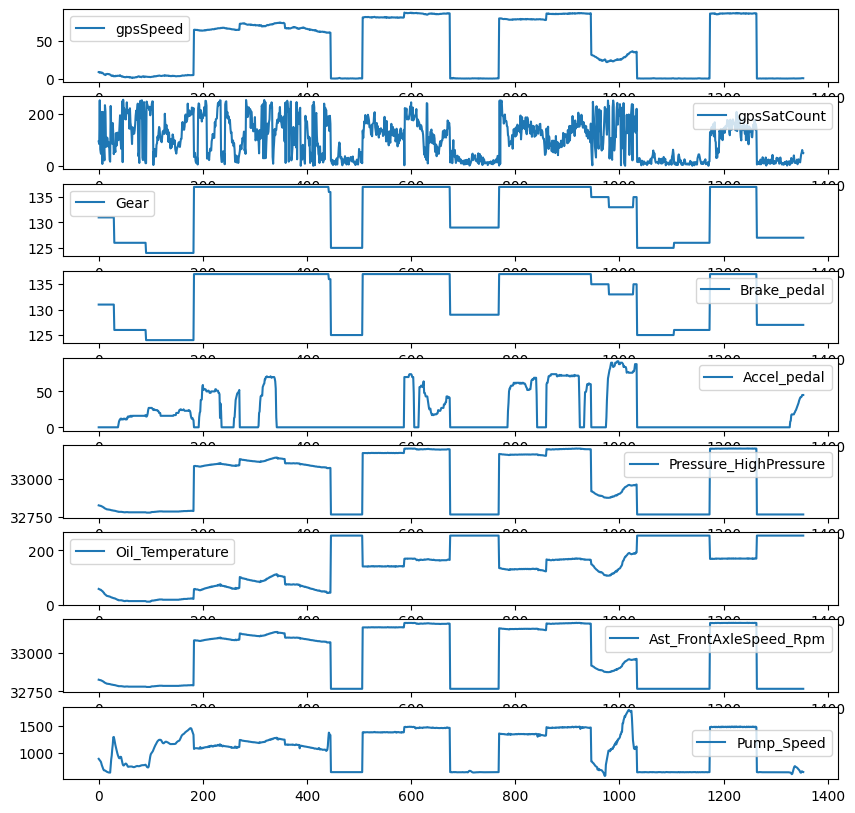

In [14]:
#define subplot layout
fig, axes = plt.subplots(nrows=len(df_extract.columns), ncols=1)

#add DataFrames to subplots
for i in range(len(df_extract.columns)):
    df_extract.plot(y = df_extract.columns[i], use_index=False ,ax=axes[i], figsize=(10, 10))
